# Centralidade de intermediação

Outra medida de centralidade muito utilizada é a centralidade de intermediação (*betweenness centrality*).
Essa medida representa o quão importante o nó é nos caminhos entre diferentes nós da rede.
Um nó com alto valor de centralidade de intermediação vai ser um importante *intermediário*
entre diferentes grupos de nós, daí o nome da medida. Também podemos ver nós com alto
grau de intermediação como *pontes* ou pontos de estrangulamento da rede.

Vamos ver o exemplo do grafo `G` abaixo:

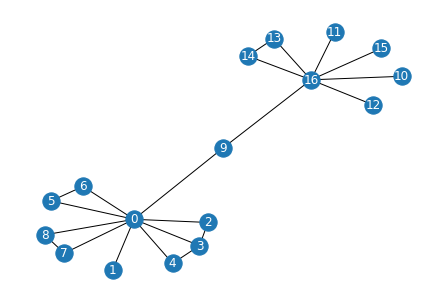

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
for i in range(17):
    G.add_node(i)

for j in range(1, 10):
    G.add_edge(0, j)

G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(5, 6)
G.add_edge(7, 8)

for j in range(10, 16):
    G.add_edge(16, j)

G.add_edge(9, 16)
G.add_edge(13, 14)

nx.draw(G, with_labels=True, font_color="white")
plt.show()

Vemos que o nó 9 tem grau relativamente baixo (grau 2), mas ele é um nó importante como
intermediário entre dois grupos praticamente separados de nós, o grupo dos nós de 0 a 8, e
o grupo de nós 10 a 16. Intuitivamente, esperamos que o nó 9 tenha um alto valor de
centralidade de intermediação.

A medida de centralidade de intermediação de um nó $n$ pode ser calculada pela contagem dos
caminhos mais curtos entre todos os pares de nós do grafo:

$$bc(n) = \sum_{p,d \in V} \frac{\sigma_{p,d}(n)}{\sigma_{p, d}}$$

Nesta fórmula, $\sigma_{p, d}$ representa todos os caminhos mais curtos entre os nós $p$ e $d$, e
$\sigma_{p, d}(n)$ é o número de caminhos mais curtos entre os nós $p$ e $d$ que passam pelo nó $n$.
Somamos esses valores para todos os possíveis pares de nós $p$ e $d$ no conjunto de nós $V$.

Existe uma questão sobre se devemos usar o nó $n$ como o início ($p$) ou fim ($d$) dos caminhos, ou
se excluímos $n$ dos extremos. As duas opções são possíveis, mas o mais comum é não incluir o nó
como um dos extremos, já que queremos obter a importância do nó na intermediação entre outros nós.

Vamos ver um exemplo, para o grafo `G2` a seguir:

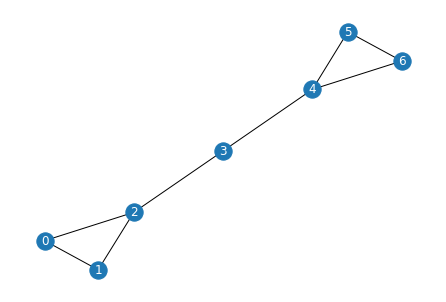

In [2]:
G2 = nx.Graph()
for i in range(7):
    G2.add_node(i)

G2.add_edges_from([(0, 1), (0, 2), (1, 2), (2, 3), (3, 4), (4, 5), (4, 6), (5, 6)])

nx.draw(G2, with_labels=True, font_color="white")
plt.show()

Qual é o valor da centralidade de intermediação do nó 3, sem incluí-lo como um dos extremos? Os caminhos
entre 0, 1 e 2 não passam por 3, assim como 7, 8 e 9. Mas temos os caminhos entre os nós dos grupos diferentes:

$$bc(3) = \frac{\sigma_{0,4}(3)}{\sigma_{0,4}} + \frac{\sigma_{0,5}(3)}{\sigma_{0,5}} + \frac{\sigma_{0,6}(3)}{\sigma_{0,6}} + \cdots = 9$$

## Normalização

Assim como fizemos com a medida de centralidade de grau (que na verdade é uma normalização do grau do nó), podemos
normalizar a centralidade de intermediação. Isso nos permite comparar nós de grafos diferentes por suas medidas
de centralidade de intermediação. Sem a normalização, grafos com maior número de nós naturalmente tenderão a
ter valores maiores de centralidade de intermediação.

A forma de normalizar é dividir a medida calculada antes pelo número total de caminhos possíveis no grafo. Se
optamos por não incluir o nó para o qual estamos calculando a centralidade de intermediação nos extremos dos
caminhos possíveis, o número de caminhos é dado por

$$C = \frac{1}{2} (N - 1) (N - 2)$$

E assim podemos calcular a centralidade de intermediação normalizada do nó $n$:

$$bc(n) = \frac{1}{C} \sum_{p,d \in V} \frac{\sigma_{p,d}(n)}{\sigma_{p, d}}$$

Na biblioteca NetworkX é possível calcular a centralidade de intermediação com ou sem normalização. Por padrão,
os valores são normalizados.

## Complexidade computacional

O problema do cálculo de centralidade de intermediação é que ela requer calcular os caminhos mais curtos entre
todos os possíveis pares de nós no grafo inteiro. Vimos que o número de caminhos que temos que
considerar para calcular a centralidade de intermediação é

$$C = \frac{1}{2} (N - 1) (N - 2)$$

Esse número é claramente proporcional a $N^2$, então o algoritmo mais simples para calcular centralidade
de intermediação deve ser, pelo menos, $O(N^2)$ em espaço e tempo.

Existem algumas formas de reduzir essa carga computacional. Uma delas é aceitar um cálculo aproximado da
centralidade de intermediação, calculando os valores por uma amostra de nós, ao invés de todos os nós do
grafo. Naturalmente, esperamos que a aproximação vai ser melhor quanto mais próximo o tamanho da amostra
for do número total de nós do grafo.

## Calculando centralidade de intermediação com NetworkX

Para calcular a centralidade de intermediação usando NetworkX, usamos a função `nx.betweenness_centrality`.
Vamos conferir nosso cálculo da centralidade de intermediação do nó 3 no grafo `G2`. Como calculamos o
valor não normalizado, precisamos selecionar essa opção na chamada:

In [3]:
inter_G2 = nx.betweenness_centrality(G2, normalized=False)
inter_G2[3]

9.0

Para calcular o valor de centralidade de intermediaçao usando uma amostra dos nós, passamos o tamanho
da amostra como o parâmetro de nome `k`:

In [4]:
inter_G_aprox = nx.betweenness_centrality(G, k=12)
inter_G_aprox[9]

0.5135416666666667

Nesse caso, o grafo `G` tem 17 nós e usamos uma amostra de 12 nós, mas podemos verificar
diretamente a qualidade da aproximação calculando o valor correto da centralidade de intermediação do
nó 9:

In [5]:
inter_G = nx.betweenness_centrality(G)
inter_G[9]

0.525

Como esperado, a aproximação ficou boa, com uma diferença de pouco mais de 2% em relação ao valor real:

In [6]:
(inter_G[9] - inter_G_aprox[9]) / inter_G[9] * 100.0

2.182539682539685

# Atividades

## 1. Aproximações no grafo de atores

Nesta etapa, vamos explorar o uso de aproximações do valor de centralidade de intemediação no grafo de
atores que foi construído antes. Calcular a centralidade de intermediação exata, sem aproximações, no
grafo de atores, se mostra inviável devido ao alto número de nós e o fato do algoritmo ser, no mínimo,
$O(N^2)$ para $N$ o número de nós no grafo.

Por isso, vamos explorar o uso de aproximações. Carregue o grafo dos atores do arquivo `data/grafo_atores.gexf`
e calcule a centralidade de intermediação usando a função `nx.betweenness_centrality`, passando o parâmetro
`k` com valor 5 (calcular a centralidade com uma amostra de 5 nós). Mostre quais são os cinco maiores valores
de centralidade de intermediação e quais nós estão associados a esses valores. Faça uma análise dos nós
encontrados com altos valores, verificando quem são as pessoas associadas.

## 2. Aumentando o tamanho da amostra

Repita o cálculo e as análises do item anterior para `k` com valor 10, 15 e 20. Verifique os maiores valores
de centralidade encontrados, e quais os nós tem valores mais altos. Verifique se os nós com maior
centralidade mudam à medida que o número de nós da amostra aumenta; isso dá uma indicação se a aproximação
é relativamente estável.

**Opcional**: Verifique até qual valor de `k` é possível calcular a centralidade de intermediação no
grafo de atores dentro de um limite de tempo que você considere razoável. Analise se, nesse maior valor de `k`, os
valores observados e a ordenação dos nós de acordo com o valor de centralidade de intermediação mudam muito em
relação aos obtidos com `k` igual a 20.

## 1

In [19]:
import numpy as np

def between(k):
    
    centrality_ = nx.betweenness_centrality(rede_atores, k=k)
    between = [centrality_[no] for no in centrality_]
    bet = np.argsort(between)[::-1]
    maiores = [between[ind] for ind in bet[:5]]
    
    atores = []

    for no in centrality_:
        for number in maiores:
            if centrality_[no] == number:
                atores.append(no)
                
    return atores, maiores

def print_atores(atores, k):
    print(f'Para k = {k}\n')
    for ator in atores:
        print(f'{rede_atores.nodes()[ator]}')
        
def print_numeros(maiores, k):
    print(f'Para k = {k}\n')
    for numb in maiores:
        print(f'{numb}')

In [8]:
rede_atores = nx.read_gexf("grafo_atores.gexf")

In [11]:
atores, maiores_valores = between(5)

In [12]:
atores

['nm0949237', 'nm1485339', 'nm1591928', 'nm6643211', 'nm9200160']

In [20]:
print_atores(atores, 5)

Para k = 5

{'nome': 'Aden Young', 'label': 'nm0949237'}
{'nome': 'David Thomas Jenkins', 'label': 'nm1485339'}
{'nome': 'Thomas Goersch', 'label': 'nm1591928'}
{'nome': 'Muriel Lorca', 'label': 'nm6643211'}
{'nome': 'Muriel Andrée', 'label': 'nm9200160'}


In [21]:
print_numeros(maiores_valores, 5)

Para k = 5

0.137381365305294
0.13669309704672872
0.12975598299561455
0.10230850782943324
0.10154483648645518


Os 3 primeiros participaram de muitos filmes, os 2 últimos eu não encontrei muitas informações

## 2

In [25]:
atores_10, maiores_10 = between(10)

In [28]:
atores_15, maiores_15 = between(15)
atores_20, maiores_20 = between(20)

In [29]:
print_atores(atores_10, 10)
print('')
print_atores(atores_15, 15)
print('')
print_atores(atores_20, 20)

Para k = 10

{'nome': 'Frédéric Deban', 'label': 'nm0213313'}
{'nome': 'Carlos Fariello', 'label': 'nm0267437'}
{'nome': 'Gianni Ippoliti', 'label': 'nm0409714'}
{'nome': 'Richard Ryan', 'label': 'nm2737097'}
{'nome': 'Murilo Cezar', 'label': 'nm8946682'}

Para k = 15

{'nome': 'Golshifteh Farahani', 'label': 'nm0267042'}
{'nome': 'Azita Hajian', 'label': 'nm0354492'}
{'nome': 'Anders Baasmo Christiansen', 'label': 'nm0471601'}
{'nome': 'Albert Laveau', 'label': 'nm1195270'}
{'nome': 'Stephen Stix Josey', 'label': 'nm3124502'}

Para k = 20

{'nome': 'Helena Miquel', 'label': 'nm2865013'}
{'nome': 'Jeremy Larter', 'label': 'nm3507273'}
{'nome': 'Lucy Wirth', 'label': 'nm3859476'}
{'nome': 'Willhelm Grotenfelt', 'label': 'nm4473389'}
{'nome': 'Ian Rowe', 'label': 'nm6814838'}


In [31]:
print_numeros(maiores_10, 10)
print('')
print_numeros(maiores_15, 15)
print('')
print_numeros(maiores_20, 20)

Para k = 10

0.06869324311366652
0.06869194964453082
0.0686911947448509
0.06816064890725519
0.06815753679118539

Para k = 15

0.04583923175793729
0.0457941298299006
0.0449092861398937
0.04211077433810273
0.03361585753873635

Para k = 20

0.034355486350831646
0.03435383830447854
0.034352425268477524
0.03435143596413393
0.03435093027416513


Os nós estão mudando demais com o aumento do número, então acredito que não é uma boa aproximação.